In [27]:
#Importing the libraries required for the prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [28]:
data = pd.read_csv('/content/Kaggle dataset_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Data preprocessing
# Dropping irrelevant columns
data = data.drop(['customerID','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract'], axis=1, errors = 'ignore')

# Converting categorical columns to numerical columns
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Converting 'TotalCharges' column to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handling missing values
data = data.dropna()


In [30]:
# Splitting the dataset into training and testing sets
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values  # Select the last column as target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
# Training the decision tree model
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [34]:
# Evaluating the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.7185501066098081
Confusion Matrix: [[828 210]
 [186 183]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1038
           1       0.47      0.50      0.48       369

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.72      0.72      1407



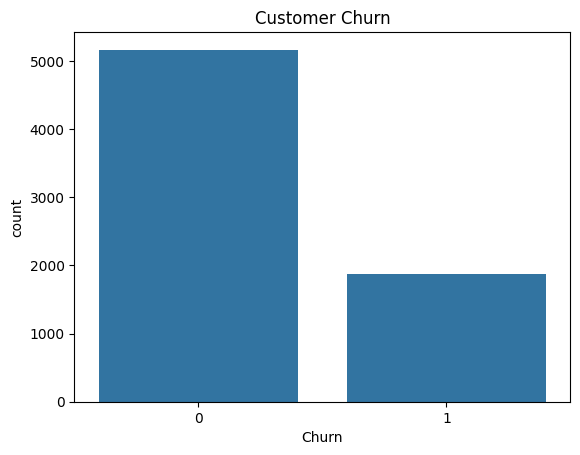

In [35]:
# Visualizing the results
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn')
plt.show()